In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content/drive/MyDrive/'

In [ ]:
!kaggle datasets download -d bobbyscience/league-of-legends-diamond-ranked-games-10-min

  0% 0.00/539k [00:00<?, ?B/s]
100% 539k/539k [00:00<00:00, 35.8MB/s]


In [ ]:
!unzip \*.zip && rm *.zip

Archive:  league-of-legends-diamond-ranked-games-10-min.zip
  inflating: high_diamond_ranked_10min.csv  


In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler

In [ ]:
df = pd.read_csv('high_diamond_ranked_10min.csv')

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/AReyH/LoL_Dataset/master/high_diamond_ranked_10min.csv')

In [ ]:
df

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,blueTowersDestroyed,blueTotalGold,blueAvgLevel,blueTotalExperience,blueTotalMinionsKilled,blueTotalJungleMinionsKilled,blueGoldDiff,blueExperienceDiff,blueCSPerMin,blueGoldPerMin,redWardsPlaced,redWardsDestroyed,redFirstBlood,redKills,redDeaths,redAssists,redEliteMonsters,redDragons,redHeralds,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,0,0,17210,6.6,17039,195,36,643,-8,19.5,1721.0,15,6,0,6,9,8,0,0,0,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,0,0,14712,6.6,16265,174,43,-2908,-1173,17.4,1471.2,12,1,1,5,5,2,2,1,1,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,0,0,16113,6.4,16221,186,46,-1172,-1033,18.6,1611.3,15,3,1,11,7,14,0,0,0,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,1,0,15157,7.0,17954,201,55,-1321,-7,20.1,1515.7,15,2,1,5,4,10,0,0,0,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,0,0,16400,7.0,18543,210,57,-1004,230,21.0,1640.0,17,2,1,6,6,7,1,1,0,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9874,4527873286,1,17,2,1,7,4,5,1,1,0,0,17765,7.2,18967,211,69,2519,2469,21.1,1776.5,46,3,0,4,7,7,0,0,0,0,15246,6.8,16498,229,34,-2519,-2469,22.9,1524.6
9875,4527797466,1,54,0,0,6,4,8,1,1,0,0,16238,7.2,19255,233,48,782,888,23.3,1623.8,12,21,1,4,6,3,0,0,0,0,15456,7.0,18367,206,56,-782,-888,20.6,1545.6
9876,4527713716,0,23,1,0,6,7,5,0,0,0,0,15903,7.0,18032,210,45,-2416,-1877,21.0,1590.3,14,0,1,7,6,11,1,1,0,0,18319,7.4,19909,261,60,2416,1877,26.1,1831.9
9877,4527628313,0,14,4,1,2,3,3,1,1,0,0,14459,6.6,17229,224,48,-839,-1085,22.4,1445.9,66,4,0,3,2,1,0,0,0,0,15298,7.2,18314,247,40,839,1085,24.7,1529.8


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9879 entries, 0 to 9878
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   gameId                        9879 non-null   int64  
 1   blueWins                      9879 non-null   int64  
 2   blueWardsPlaced               9879 non-null   int64  
 3   blueWardsDestroyed            9879 non-null   int64  
 4   blueFirstBlood                9879 non-null   int64  
 5   blueKills                     9879 non-null   int64  
 6   blueDeaths                    9879 non-null   int64  
 7   blueAssists                   9879 non-null   int64  
 8   blueEliteMonsters             9879 non-null   int64  
 9   blueDragons                   9879 non-null   int64  
 10  blueHeralds                   9879 non-null   int64  
 11  blueTowersDestroyed           9879 non-null   int64  
 12  blueTotalGold                 9879 non-null   int64  
 13  blu

In [ ]:
df.isna().sum()

gameId                          0
blueWins                        0
blueWardsPlaced                 0
blueWardsDestroyed              0
blueFirstBlood                  0
blueKills                       0
blueDeaths                      0
blueAssists                     0
blueEliteMonsters               0
blueDragons                     0
blueHeralds                     0
blueTowersDestroyed             0
blueTotalGold                   0
blueAvgLevel                    0
blueTotalExperience             0
blueTotalMinionsKilled          0
blueTotalJungleMinionsKilled    0
blueGoldDiff                    0
blueExperienceDiff              0
blueCSPerMin                    0
blueGoldPerMin                  0
redWardsPlaced                  0
redWardsDestroyed               0
redFirstBlood                   0
redKills                        0
redDeaths                       0
redAssists                      0
redEliteMonsters                0
redDragons                      0
redHeralds    

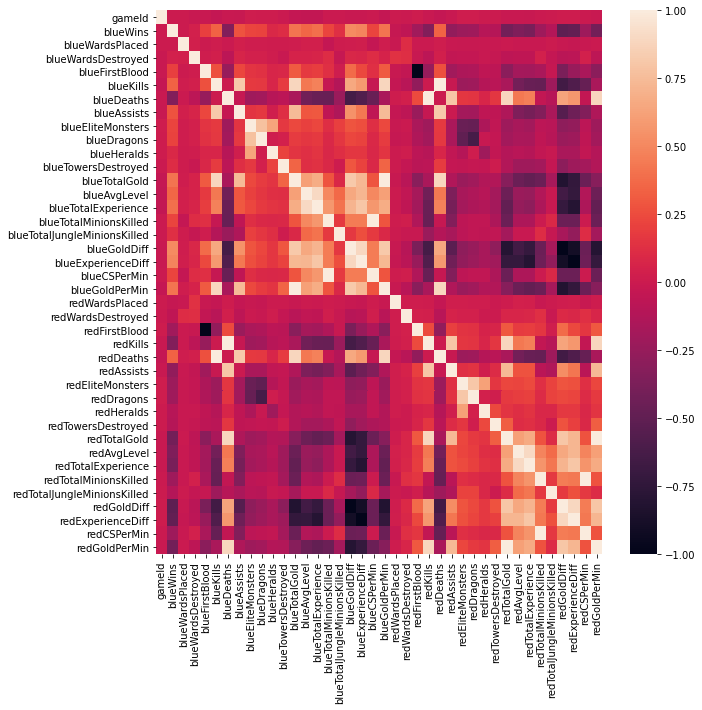

In [ ]:
corr = df.corr()

plt.figure(figsize=(10,10))

sns.heatmap(corr,
            xticklabels=df.columns,
            yticklabels=df.columns,
            annot=False)

In [ ]:
corr_list = df[df.columns[1:]].apply(lambda x: x.corr(df['blueWins']))
cols=[]
# This appends the columns that have a correlation bigger than 0.2, and less than 0.2
for col in corr_list.index:
    if (corr_list[col]>0.2 or corr_list[col]<-0.2):
        cols.append(col)

In [ ]:
cols

['blueWins',
 'blueFirstBlood',
 'blueKills',
 'blueDeaths',
 'blueAssists',
 'blueEliteMonsters',
 'blueDragons',
 'blueTotalGold',
 'blueAvgLevel',
 'blueTotalExperience',
 'blueTotalMinionsKilled',
 'blueGoldDiff',
 'blueExperienceDiff',
 'blueCSPerMin',
 'blueGoldPerMin',
 'redFirstBlood',
 'redKills',
 'redDeaths',
 'redAssists',
 'redEliteMonsters',
 'redDragons',
 'redTotalGold',
 'redAvgLevel',
 'redTotalExperience',
 'redTotalMinionsKilled',
 'redGoldDiff',
 'redExperienceDiff',
 'redCSPerMin',
 'redGoldPerMin']

In [ ]:
df_1 = df[['blueWins','blueFirstBlood','blueKills','redKills','blueAssists','redAssists','blueEliteMonsters',
             'redEliteMonsters','blueDragons','redDragons','blueTotalExperience','redTotalExperience',
             'blueTotalGold','redTotalGold','blueCSPerMin','redCSPerMin']]

In [ ]:
df_2 = df[['blueWins','blueFirstBlood','blueKills','redKills','blueAssists','redAssists','blueEliteMonsters',
            'redEliteMonsters','blueDragons','redDragons','blueExperienceDiff','blueGoldDiff','blueCSPerMin',
           'redCSPerMin']]

In [ ]:
def preprocess_input(df):
  df = df.copy()

  # Split the values
  y = df['blueWins']
  X = df.drop('blueWins',axis=1)

  # Train test split

  X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.7,random_state=42)

  # Scale the data
  scaler = StandardScaler()
  scaler.fit(X_train)

  X_train = scaler.transform(X_train)
  X_test = scaler.transform(X_test)

  return X_train,X_test,y_train,y_test

In [ ]:
X_train,X_test,y_train,y_test = preprocess_input(df_2)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC, SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier

models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Support Vector Machine (Linear Kernel)': LinearSVC(),
    'Support Vector Machine (RBF Kernel)': SVC(),
    'Decission Tree': DecisionTreeClassifier(),
    'Adaboost': AdaBoostClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting Classifier': GradientBoostingClassifier()

}

for name, model in models.items():
  model.fit(X_train,y_train)
  print(name + ' trained')

Logistic Regression trained
Support Vector Machine (Linear Kernel) trained
Support Vector Machine (RBF Kernel) trained
Decission Tree trained
Adaboost trained
Random Forest trained
Gradient Boosting Classifier trained


In [ ]:
from sklearn.metrics import accuracy_score, precision_score,recall_score,f1_score

scores_list = []
for name,model in models.items():
  print(f'Accuracy Score for {name}: {accuracy_score(y_test,model.predict(X_test))}')
  print(f'Precision Score for {name}: {precision_score(y_test,model.predict(X_test))}')
  print(f'Recall Score for {name}: {recall_score(y_test,model.predict(X_test))}')
  print(f'F1 Score for {name}: {f1_score(y_test,model.predict(X_test))}')
  scores_list.append(
        {
            'Model': name,
            'Accuracy': accuracy_score(y_test,model.predict(X_test)),
            'Precision':  precision_score(y_test,model.predict(X_test)),
            'Recall': recall_score(y_test,model.predict(X_test)),
            'F1-Score': f1_score(y_test,model.predict(X_test))
        }
    )

scores_2 = pd.DataFrame(scores_list)

Accuracy Score for Logistic Regression: 0.7294197031039136
Precision Score for Logistic Regression: 0.732605729877217
Recall Score for Logistic Regression: 0.7237196765498652
F1 Score for Logistic Regression: 0.7281355932203389
Accuracy Score for Support Vector Machine (Linear Kernel): 0.7277327935222672
Precision Score for Support Vector Machine (Linear Kernel): 0.730428863172226
Recall Score for Support Vector Machine (Linear Kernel): 0.7230458221024259
F1 Score for Support Vector Machine (Linear Kernel): 0.7267185912631223
Accuracy Score for Support Vector Machine (RBF Kernel): 0.7213225371120108
Precision Score for Support Vector Machine (RBF Kernel): 0.7259615384615384
Recall Score for Support Vector Machine (RBF Kernel): 0.7122641509433962
F1 Score for Support Vector Machine (RBF Kernel): 0.719047619047619
Accuracy Score for Decission Tree: 0.6241565452091767
Precision Score for Decission Tree: 0.6202860858257477
Recall Score for Decission Tree: 0.6428571428571429
F1 Score for De

In [ ]:
scores

,Model,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression,0.729420,0.732606,0.723720,0.728136
1,Support Vector Machine (Linear Kernel),0.730769,0.733970,0.725067,0.729492
2,Support Vector Machine (RBF Kernel),0.720985,0.723014,0.717655,0.720325
3,Decission Tree,0.628205,0.631543,0.617925,0.624659
4,Adaboost,0.726383,0.733195,0.712938,0.722924
5,Random Forest,0.725034,0.732130,0.710916,0.721368
6,Gradient Boosting Classifier,0.721323,0.726584,0.710916,0.718665


In [ ]:
scores_2

,Model,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression,0.729420,0.732606,0.723720,0.728136
1,Support Vector Machine (Linear Kernel),0.727733,0.730429,0.723046,0.726719
2,Support Vector Machine (RBF Kernel),0.721323,0.725962,0.712264,0.719048
3,Decission Tree,0.624157,0.620286,0.642857,0.631370
4,Adaboost,0.724359,0.730477,0.712264,0.721256
5,Random Forest,0.725709,0.730902,0.715633,0.723187
6,Gradient Boosting Classifier,0.727058,0.729436,0.723046,0.726227


In [ ]:
print(scores['F1-Score'].mean())
print(scores_2['F1-Score'].mean())

0.7093668628755354
0.711567523919394


In [ ]:
X_train.shape

(6915, 13)

### **Neural Network**

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.optimizers import SGD

In [ ]:
model = Sequential()
model.add(Dense(256,activation='relu', input_shape=(13,)))
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(64,activation='linear'))
model.add(Dense(32,activation='relu'))
#model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))


In [ ]:
model.compile(
      optimizer='adam',
      loss='binary_crossentropy',
      metrics=['accuracy',tf.keras.metrics.AUC(name='auc')]
  )

In [ ]:
history = model.fit(X_train,y_train,batch_size=64,validation_split=0.1, epochs=20,callbacks=[tf.keras.callbacks.ReduceLROnPlateau()],verbose=2)

Epoch 1/20
98/98 - 1s - loss: 0.5496 - accuracy: 0.7156 - auc: 0.7932 - val_loss: 0.5288 - val_accuracy: 0.7413 - val_auc: 0.8158
Epoch 2/20
98/98 - 0s - loss: 0.5353 - accuracy: 0.7313 - auc: 0.8061 - val_loss: 0.5279 - val_accuracy: 0.7428 - val_auc: 0.8132
Epoch 3/20
98/98 - 0s - loss: 0.5309 - accuracy: 0.7321 - auc: 0.8094 - val_loss: 0.5251 - val_accuracy: 0.7327 - val_auc: 0.8134
Epoch 4/20
98/98 - 0s - loss: 0.5283 - accuracy: 0.7294 - auc: 0.8112 - val_loss: 0.5241 - val_accuracy: 0.7312 - val_auc: 0.8147
Epoch 5/20
98/98 - 0s - loss: 0.5236 - accuracy: 0.7381 - auc: 0.8160 - val_loss: 0.5266 - val_accuracy: 0.7312 - val_auc: 0.8116
Epoch 6/20
98/98 - 0s - loss: 0.5205 - accuracy: 0.7416 - auc: 0.8186 - val_loss: 0.5328 - val_accuracy: 0.7399 - val_auc: 0.8071
Epoch 7/20
98/98 - 0s - loss: 0.5181 - accuracy: 0.7405 - auc: 0.8200 - val_loss: 0.5369 - val_accuracy: 0.7269 - val_auc: 0.8100
Epoch 8/20
98/98 - 0s - loss: 0.5172 - accuracy: 0.7461 - auc: 0.8227 - val_loss: 0.5360 -

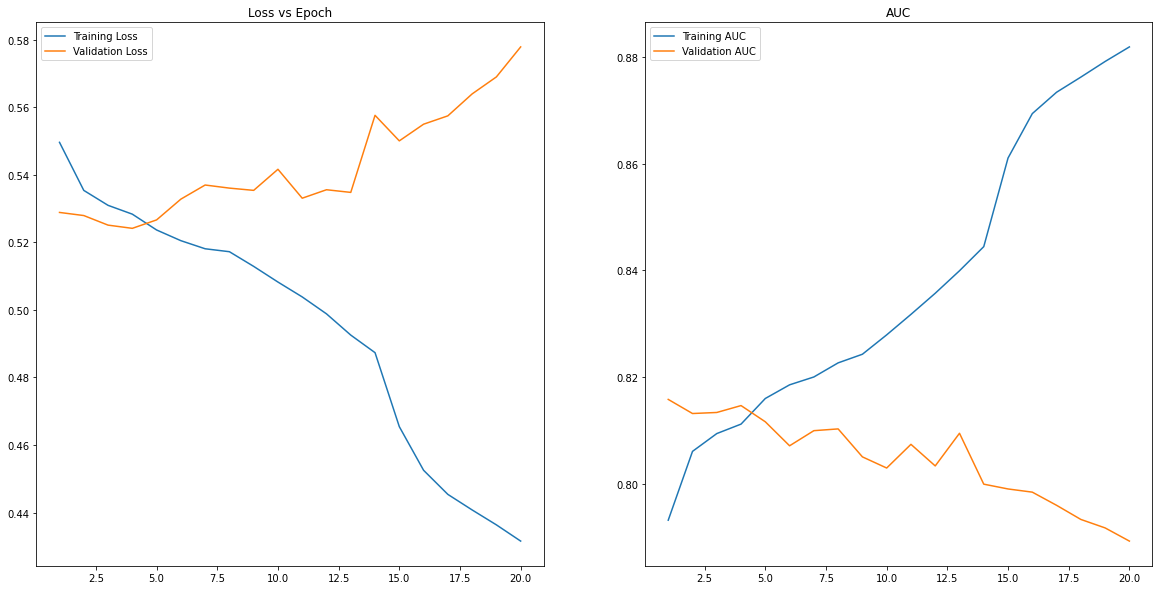

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))

epochs_range = range(1,21)

train_loss,val_loss = history.history['loss'],history.history['val_loss']
train_auc,val_auc = history.history['auc'],history.history['val_auc']

plt.subplot(1,2,1)
plt.plot(epochs_range,train_loss,label='Training Loss')
plt.plot(epochs_range,val_loss,label='Validation Loss')
plt.title('Loss vs Epoch')
plt.legend()

plt.subplot(1,2,2)
plt.plot(epochs_range,train_auc,label='Training AUC')
plt.plot(epochs_range,val_auc,label='Validation AUC')
plt.title('AUC')
plt.legend()
plt.show()

#### **Hyperparameter tuning**

In [ ]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

In [ ]:
def c_model():
  model = Sequential()
  model.add(Dense(256,activation='relu', input_shape=(13,)))
  model.add(Dense(128,activation='relu'))
  model.add(Dense(64,activation='relu'))
  #model.add(Dropout(0.5))
  model.add(Dense(1,activation='sigmoid'))
  model.compile(loss='binary_crossentropy',optimizer='rmsprop',metrics=['accuracy'])
  return model

model = KerasClassifier(build_fn=c_model, epochs=10,batch_size=64)

In [ ]:
model.fit(X_train,y_train,batch_size=64,validation_split=0.1, epochs=20,callbacks=[tf.keras.callbacks.ReduceLROnPlateau()],verbose=2)

Epoch 1/20
98/98 - 1s - loss: 0.5482 - accuracy: 0.7196 - val_loss: 0.5352 - val_accuracy: 0.7327
Epoch 2/20
98/98 - 0s - loss: 0.5324 - accuracy: 0.7284 - val_loss: 0.5336 - val_accuracy: 0.7327
Epoch 3/20
98/98 - 0s - loss: 0.5299 - accuracy: 0.7318 - val_loss: 0.5288 - val_accuracy: 0.7341
Epoch 4/20
98/98 - 0s - loss: 0.5266 - accuracy: 0.7324 - val_loss: 0.5339 - val_accuracy: 0.7298
Epoch 5/20
98/98 - 0s - loss: 0.5242 - accuracy: 0.7349 - val_loss: 0.5286 - val_accuracy: 0.7254
Epoch 6/20
98/98 - 0s - loss: 0.5196 - accuracy: 0.7392 - val_loss: 0.5287 - val_accuracy: 0.7269
Epoch 7/20
98/98 - 0s - loss: 0.5179 - accuracy: 0.7392 - val_loss: 0.5321 - val_accuracy: 0.7269
Epoch 8/20
98/98 - 0s - loss: 0.5147 - accuracy: 0.7435 - val_loss: 0.5306 - val_accuracy: 0.7254
Epoch 9/20
98/98 - 0s - loss: 0.5106 - accuracy: 0.7488 - val_loss: 0.5409 - val_accuracy: 0.7168
Epoch 10/20
98/98 - 0s - loss: 0.5081 - accuracy: 0.7496 - val_loss: 0.5395 - val_accuracy: 0.7225
Epoch 11/20
98/98 -

#### Tuning optimizers|

In [ ]:
def c_model(optimizer):
  model = Sequential()
  model.add(Dense(256,activation='relu', input_shape=(13,)))
  model.add(Dense(128,activation='relu'))
  model.add(Dense(64,activation='relu'))
  #model.add(Dropout(0.5))
  model.add(Dense(1,activation='sigmoid'))
  model.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])
  return model

model = KerasClassifier(build_fn=c_model, epochs=10,batch_size=50)
parameters = {'optimizer':['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']}
clf = GridSearchCV(model, parameters)
clf.fit(X_train,y_train)

Epoch 1/10
111/111 [==============================] - 1s 2ms/step - loss: 0.6710 - accuracy: 0.6022
Epoch 2/10
111/111 [==============================] - 0s 2ms/step - loss: 0.5937 - accuracy: 0.7234
Epoch 3/10
111/111 [==============================] - 0s 2ms/step - loss: 0.5561 - accuracy: 0.7264
Epoch 4/10
111/111 [==============================] - 0s 2ms/step - loss: 0.5402 - accuracy: 0.7242
Epoch 5/10
111/111 [==============================] - 0s 2ms/step - loss: 0.5406 - accuracy: 0.7220
Epoch 6/10
111/111 [==============================] - 0s 2ms/step - loss: 0.5337 - accuracy: 0.7319
Epoch 7/10
111/111 [==============================] - 0s 2ms/step - loss: 0.5333 - accuracy: 0.7250
Epoch 8/10
111/111 [==============================] - 0s 1ms/step - loss: 0.5286 - accuracy: 0.7310
Epoch 9/10
111/111 [==============================] - 0s 2ms/step - loss: 0.5186 - accuracy: 0.7356
Epoch 10/10
28/28 [==============================] - 0s 1ms/step - loss: 0.5482 - accuracy: 0.7202
E

GridSearchCV(cv=None, error_score=nan,
             estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x7f2a3bcd14a8>,
             iid='deprecated', n_jobs=None,
             param_grid={'optimizer': ['SGD', 'RMSprop', 'Adagrad', 'Adadelta',
                                       'Adam', 'Adamax', 'Nadam']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
print(clf.best_score_, clf.best_params_)
means = clf.cv_results_['mean_test_score']
parameters = clf.cv_results_['params']
for mean, parameter in zip(means,parameters):
  print(mean,parameter)

0.7246565461158753 {'optimizer': 'Adagrad'}
0.7243673086166382 {'optimizer': 'SGD'}
0.7169920563697815 {'optimizer': 'RMSprop'}
0.7246565461158753 {'optimizer': 'Adagrad'}
0.6614605903625488 {'optimizer': 'Adadelta'}
0.7197396874427795 {'optimizer': 'Adam'}
0.7242227077484131 {'optimizer': 'Adamax'}
0.7119305968284607 {'optimizer': 'Nadam'}


Tuning activation function

In [ ]:
def c_model(activation):
  model = Sequential()
  model.add(Dense(256,activation=activation, input_shape=(13,)))
  model.add(Dense(128,activation=activation))
  model.add(Dense(64,activation=activation))
  #model.add(Dropout(0.5))
  model.add(Dense(1,activation='sigmoid'))
  model.compile(loss='binary_crossentropy',optimizer='Adamax',metrics=['accuracy'])
  return model

model = KerasClassifier(build_fn=c_model, epochs=10,batch_size=50)
parameters = {'activation':['softmax', 'softplus', 'softsign', 'relu', 'tanh', 'sigmoid', 'hard_sigmoid','linear']}
clf = GridSearchCV(model, parameters)
clf.fit(X_train,y_train)

Epoch 1/10
111/111 [==============================] - 1s 2ms/step - loss: 0.6929 - accuracy: 0.5120
Epoch 2/10
111/111 [==============================] - 0s 2ms/step - loss: 0.6929 - accuracy: 0.5120
Epoch 3/10
111/111 [==============================] - 0s 2ms/step - loss: 0.6931 - accuracy: 0.5041
Epoch 4/10
111/111 [==============================] - 0s 2ms/step - loss: 0.6929 - accuracy: 0.5115
Epoch 5/10
111/111 [==============================] - 0s 2ms/step - loss: 0.6930 - accuracy: 0.5100
Epoch 6/10
111/111 [==============================] - 0s 2ms/step - loss: 0.6930 - accuracy: 0.5075
Epoch 7/10
111/111 [==============================] - 0s 2ms/step - loss: 0.6930 - accuracy: 0.5083
Epoch 8/10
111/111 [==============================] - 0s 2ms/step - loss: 0.6932 - accuracy: 0.4995
Epoch 9/10
111/111 [==============================] - 0s 2ms/step - loss: 0.6933 - accuracy: 0.4884
Epoch 10/10
28/28 [==============================] - 0s 1ms/step - loss: 0.6931 - accuracy: 0.4888
E

GridSearchCV(cv=None, error_score=nan,
             estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x7f2a3b43b1d0>,
             iid='deprecated', n_jobs=None,
             param_grid={'activation': ['softmax', 'softplus', 'softsign',
                                        'relu', 'tanh', 'sigmoid',
                                        'hard_sigmoid', 'linear']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
print(clf.best_score_, clf.best_params_)
means = clf.cv_results_['mean_test_score']
parameters = clf.cv_results_['params']
for mean, parameter in zip(means,parameters):
  print(mean,parameter)

0.729284155368805 {'activation': 'linear'}
0.5629790306091309 {'activation': 'softmax'}
0.726825749874115 {'activation': 'softplus'}
0.7261026859283447 {'activation': 'softsign'}
0.723788857460022 {'activation': 'relu'}
0.7246565580368042 {'activation': 'tanh'}
0.7262472748756409 {'activation': 'sigmoid'}
0.7256688356399537 {'activation': 'hard_sigmoid'}
0.729284155368805 {'activation': 'linear'}


Best model

In [ ]:
model = Sequential()
model.add(Dense(256,activation='hard_sigmoid', input_shape=(13,)))
model.add(Dense(128,activation='hard_sigmoid'))
model.add(Dense(64,activation='hard_sigmoid'))
#model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='Adamax',metrics=['accuracy'])

history = model.fit(X_train,y_train,batch_size=50,validation_split=0.2, epochs=50,verbose=2,callbacks=[tf.keras.callbacks.ReduceLROnPlateau()])


Epoch 1/50
111/111 - 1s - loss: 0.6623 - accuracy: 0.6083 - val_loss: 0.6003 - val_accuracy: 0.7231
Epoch 2/50
111/111 - 0s - loss: 0.5600 - accuracy: 0.7137 - val_loss: 0.5323 - val_accuracy: 0.7325
Epoch 3/50
111/111 - 0s - loss: 0.5421 - accuracy: 0.7216 - val_loss: 0.5304 - val_accuracy: 0.7317
Epoch 4/50
111/111 - 0s - loss: 0.5408 - accuracy: 0.7229 - val_loss: 0.5289 - val_accuracy: 0.7325
Epoch 5/50
111/111 - 0s - loss: 0.5386 - accuracy: 0.7261 - val_loss: 0.5343 - val_accuracy: 0.7252
Epoch 6/50
111/111 - 0s - loss: 0.5379 - accuracy: 0.7249 - val_loss: 0.5272 - val_accuracy: 0.7317
Epoch 7/50
111/111 - 0s - loss: 0.5391 - accuracy: 0.7238 - val_loss: 0.5276 - val_accuracy: 0.7332
Epoch 8/50
111/111 - 0s - loss: 0.5373 - accuracy: 0.7249 - val_loss: 0.5287 - val_accuracy: 0.7368
Epoch 9/50
111/111 - 0s - loss: 0.5378 - accuracy: 0.7223 - val_loss: 0.5334 - val_accuracy: 0.7274
Epoch 10/50
111/111 - 0s - loss: 0.5371 - accuracy: 0.7247 - val_loss: 0.5267 - val_accuracy: 0.7310

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])


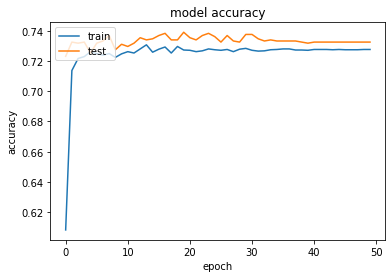

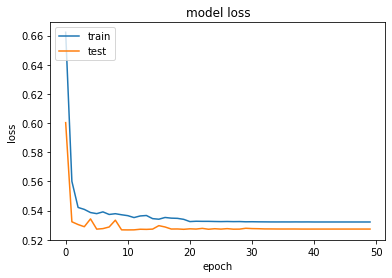

In [ ]:
import matplotlib.pyplot as plt
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()